## IMPORTING DEPENDENCIES

In [45]:
import numpy as np
import pandas as pd

import os, re
import string
import nltk 
from nltk.corpus import stopwords

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

In [46]:

train_file_path = r"C:\Users\yashs\Downloads\word2vec-nlp-tutorial\labeledTrainData.tsv\labeledTrainData.tsv"
test_file_path = r"C:\Users\yashs\Downloads\word2vec-nlp-tutorial\testData.tsv\testData.tsv"
print("Training file exists:", os.path.isfile(train_file_path))
print("Test file exists:", os.path.isfile(test_file_path))

# Read the training data
train_df = pd.read_csv(train_file_path, delimiter='\t')

# Read the test data
test_df = pd.read_csv(test_file_path, delimiter='\t')

Training file exists: True
Test file exists: True


In [47]:
train_df.shape,test_df.shape

((25000, 3), (25000, 2))

In [48]:
train_df.head()


,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [49]:
test_df.head()


,id,review
0,12311_10,Naturally in a film who's main themes are of m...
1,8348_2,This movie is a disaster within a disaster fil...
2,5828_4,"All in all, this is a movie for kids. We saw i..."
3,7186_2,Afraid of the Dark left me with the impression...
4,12128_7,A very accurate depiction of small time mob li...


In [50]:
train_df.groupby('sentiment').describe().transpose()

sentiment                                                      0  \
id     count                                               12500   
       unique                                              12500   
       top                                                7759_3   
       freq                                                    1   
review count                                               12500   
       unique                                              12432   
       top     When i got this movie free from my job, along ...   
       freq                                                    3   

sentiment                                                      1  
id     count                                               12500  
       unique                                              12500  
       top                                                5814_8  
       freq                                                    1  
review count                                               12500  
       unique                                              12472  
       top     Everyone knows about this ''Zero Day'' event. ...  
       freq                                                    2

In [51]:
#Creating a new col
train_df['length'] = train_df['review'].apply(len)
train_df.head()

,id,sentiment,review,length
0,5814_8,1,With all this stuff going down at the moment w...,2302
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",946
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,2449
3,3630_4,0,It must be assumed that those who praised this...,2245
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,2231


<Axes: ylabel='Frequency'>

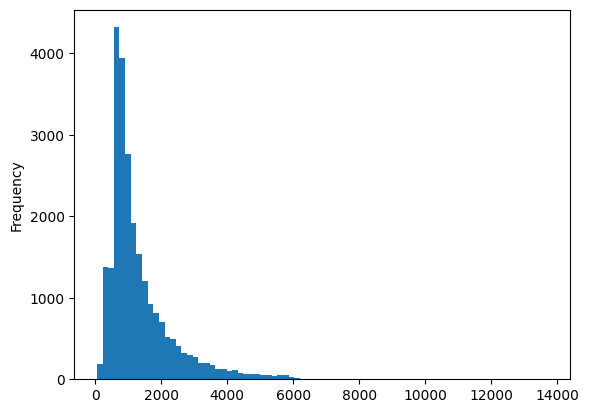

In [52]:
train_df['length'].plot.hist(bins=80)


In [53]:
train_df.length.describe()

count    25000.000000
mean      1327.710560
std       1005.239246
min         52.000000
25%        703.000000
50%        981.000000
75%       1617.000000
max      13708.000000
Name: length, dtype: float64

### RELATION BETWEEN REVIEW LENGTH AND SENTIMENT

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

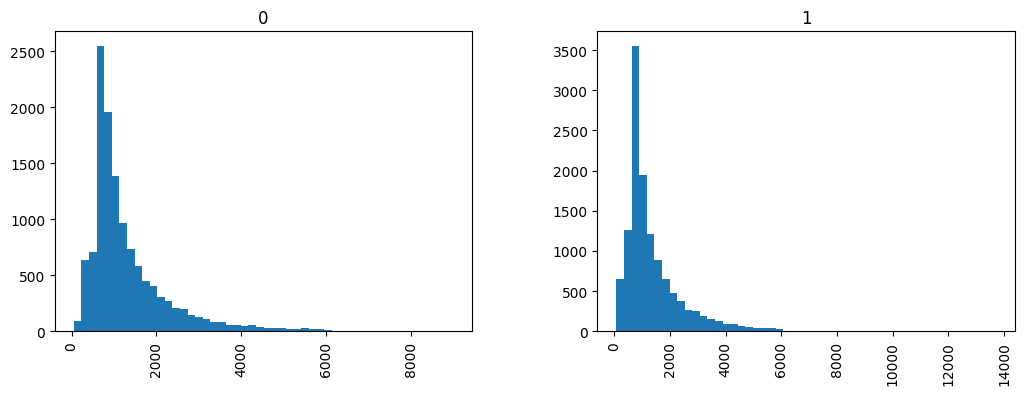

In [54]:
train_df.hist(column='length', by='sentiment', bins=50,figsize=(12,4))

In [55]:
from bs4 import BeautifulSoup

#Creating a function for cleaning of data
def clean_text(raw_text):
    # 1. remove HTML tags
    raw_text = BeautifulSoup(raw_text).get_text() 
    
    # 2. removing all non letters from text
    letters_only = re.sub("[^a-zA-Z]", " ", raw_text) 
    
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                           
    
    # 4. Create variable which contain set of stopwords
    stops = set(stopwords.words("english"))                  
    
    # 5. Remove stop word & returning   
    return [w for w in words if not w in stops]

In [56]:
train_df['clean_review']=train_df['review'].apply(clean_text)
train_df['length_clean_review'] = train_df['clean_review'].apply(len)
train_df.head()

C:\Users\yashs\AppData\Local\Temp\ipykernel_4764\1900591691.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  raw_text = BeautifulSoup(raw_text).get_text()


,id,sentiment,review,length,clean_review,length_clean_review
0,5814_8,1,With all this stuff going down at the moment w...,2302,"[stuff, going, moment, mj, started, listening,...",219
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",946,"[classic, war, worlds, timothy, hines, enterta...",84
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,2449,"[film, starts, manager, nicholas, bell, giving...",240
3,3630_4,0,It must be assumed that those who praised this...,2245,"[must, assumed, praised, film, greatest, filme...",189
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,2231,"[superbly, trashy, wondrously, unpretentious, ...",210


In [57]:
print(train_df[train_df['length_clean_review'] == 4]['review'].iloc[0])
print('------After Cleaning------')
print(train_df[train_df['length_clean_review'] == 4]['clean_review'].iloc[0])

This movie is terrible but it has some good effects.
------After Cleaning------
['movie', 'terrible', 'good', 'effects']


## WORD CLOUD

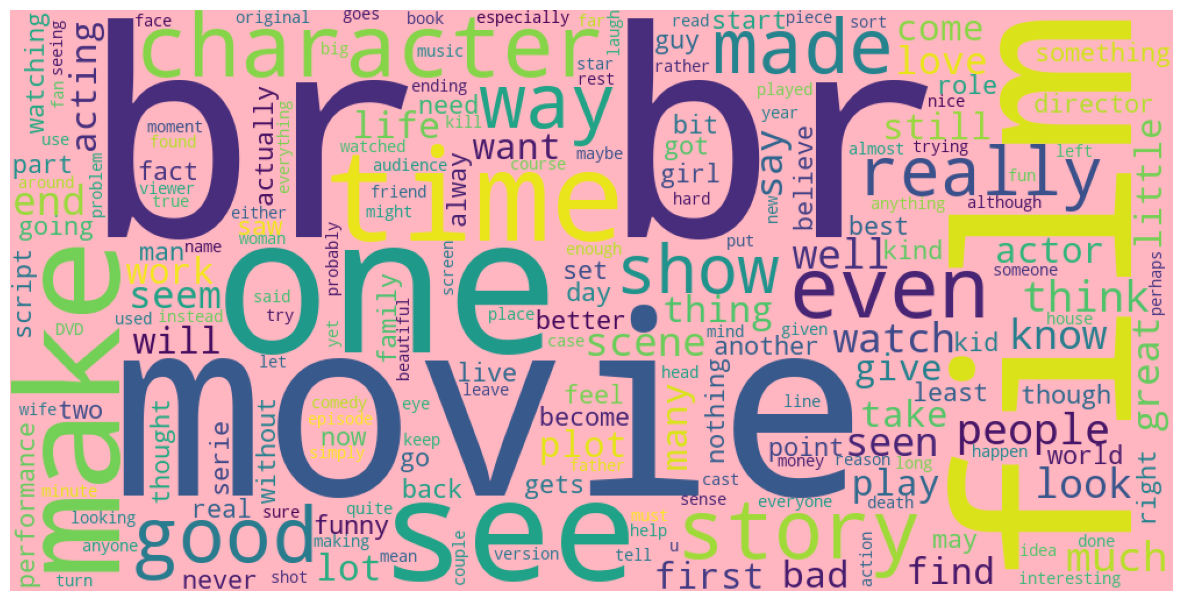

In [58]:
#Plot wordcloud
word_cloud = WordCloud(width = 1000, height = 500, stopwords = STOPWORDS, background_color = 'lightpink').generate(
                        ''.join(train_df['review']))

plt.figure(figsize = (15,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

## PROCESSING DATA

In [59]:

from sklearn.feature_extraction.text import CountVectorizer



In [60]:
bow_transform=CountVectorizer(analyzer=clean_text).fit(train_df['review'])
print(len(bow_transform.vocabulary_)) #gives the count of uniques words

C:\Users\yashs\AppData\Local\Temp\ipykernel_4764\1900591691.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  raw_text = BeautifulSoup(raw_text).get_text()


74065


In [61]:
review1 = train_df['review'][1]
print(review1)

\The Classic War of the Worlds\" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different things in a movie. Those who envision themselves as amateur \"critics\" look only to criticize everything they can. Others rate a movie on more important bases,like being entertained, which is why most people never agree with the \"critics\". We enjoyed the effort Mr. Hines put into being faithful to H.G. Wells' classic novel, and we found it to be very entertaining. This made it easy to overlook what the \"critics\" perceive to be its shortcomings."


In [62]:
bow1 = bow_transform.transform([review1])
print(bow1)
print(bow1.shape)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 67 stored elements and shape (1, 74065)>
  Coords	Values
  (0, 1153)	1
  (0, 1860)	1
  (0, 2877)	1
  (0, 5089)	1
  (0, 7345)	2
  (0, 11671)	3
  (0, 12493)	1
  (0, 14613)	1
  (0, 14617)	3
  (0, 14782)	1
  (0, 17310)	1
  (0, 19658)	1
  (0, 19759)	1
  (0, 20008)	2
  (0, 20901)	1
  (0, 21030)	1
  (0, 21035)	2
  (0, 21147)	1
  (0, 21748)	1
  (0, 21754)	1
  (0, 21757)	1
  (0, 22499)	1
  (0, 22584)	1
  (0, 22585)	1
  (0, 22788)	1
  :	:
  (0, 45216)	1
  (0, 45629)	2
  (0, 46521)	1
  (0, 46850)	1
  (0, 48251)	1
  (0, 48288)	1
  (0, 50446)	1
  (0, 51816)	1
  (0, 52690)	1
  (0, 53240)	1
  (0, 54251)	1
  (0, 58936)	1
  (0, 59991)	1
  (0, 61334)	1
  (0, 61943)	1
  (0, 63259)	1
  (0, 65725)	1
  (0, 66191)	1
  (0, 66463)	1
  (0, 70380)	1
  (0, 71340)	1
  (0, 71498)	1
  (0, 71821)	2
  (0, 72911)	1
  (0, 73396)	1
(1, 74065)


In [63]:

review_bow = bow_transform.transform(train_df['review'])

C:\Users\yashs\AppData\Local\Temp\ipykernel_4764\1900591691.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  raw_text = BeautifulSoup(raw_text).get_text()


In [64]:
print('Shape of sparse matrix',review_bow.shape)
print('amount of non - zero occurence',review_bow.nnz)

Shape of sparse matrix (25000, 74065)
amount of non - zero occurence 2450404


In [65]:
sparsity = (100.0 * review_bow.nnz / (review_bow.shape[0] * review_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.1323380274083575


In [66]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(review_bow)
tfidf1 = tfidf_transformer.transform(bow1)
print(tfidf1)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 67 stored elements and shape (1, 74065)>
  Coords	Values
  (0, 1153)	0.08360963740969239
  (0, 1860)	0.10154393297810049
  (0, 2877)	0.10199648681145217
  (0, 5089)	0.1363767739136488
  (0, 7345)	0.13372374581068766
  (0, 11671)	0.19644327376607873
  (0, 12493)	0.05973406347170702
  (0, 14613)	0.12469981772952705
  (0, 14617)	0.2754577864695353
  (0, 14782)	0.11285706893716992
  (0, 17310)	0.06153793056932125
  (0, 19658)	0.07985680613966427
  (0, 19759)	0.0783636582634987
  (0, 20008)	0.157199580701254
  (0, 20901)	0.07083536374522043
  (0, 21030)	0.09882124404859956
  (0, 21035)	0.13604634273405655
  (0, 21147)	0.15476362331540858
  (0, 21748)	0.05242341055581425
  (0, 21754)	0.06169857687281038
  (0, 21757)	0.060832898393797456
  (0, 22499)	0.054243084733876706
  (0, 22584)	0.1040378820211975
  (0, 22585)	0.1385016961626652
  (0, 22788)	0.10110289576849554
  :	:
  (0, 45216)	0.08006252757098448
  (0, 45629)	0.143768401117

In [67]:
print(tfidf_transformer.idf_[bow_transform.vocabulary_['war']])
print(tfidf_transformer.idf_[bow_transform.vocabulary_['book']])

4.070495818949949
3.8577509748566374


In [68]:
review_tfidf = tfidf_transformer.transform(review_bow)
print(review_tfidf.shape)

(25000, 74065)


In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df['review'], train_df['sentiment'], test_size=0.22, random_state=101)

len(X_train), len(X_test), len(X_train) + len(X_test)

(19500, 5500, 25000)

## CLASSIFICATION REPORT OF LOGISTIC REGRESSION

In [79]:
from sklearn.metrics import classification_report
#Predicting & Stats Function
def pred(predicted,compare):
    cm = pd.crosstab(compare,predicted)
    TN = cm.iloc[0,0]
    FN = cm.iloc[1,0]
    TP = cm.iloc[1,1]
    FP = cm.iloc[0,1]
    print("CONFUSION MATRIX ------->> ")
    print(cm)
    print()
    
    ##check accuracy of model
    print('Classification paradox :------->>')
    print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
    print()
    print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
    print()
    print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))
    print()
    print(classification_report(compare,predicted))
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()



C:\Users\yashs\AppData\Local\Temp\ipykernel_4764\1900591691.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  raw_text = BeautifulSoup(raw_text).get_text()
C:\Users\yashs\AppData\Local\Temp\ipykernel_4764\1900591691.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  raw_text = BeautifulSoup(raw_text).get_text()


CONFUSION MATRIX ------->> 
col_0         0     1
sentiment            
0          9047   677
1           503  9273

Classification paradox :------->>
Accuracy :-  93.95

False Negative Rate :-  5.15

False Postive Rate :-  6.96

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      9724
           1       0.93      0.95      0.94      9776

    accuracy                           0.94     19500
   macro avg       0.94      0.94      0.94     19500
weighted avg       0.94      0.94      0.94     19500



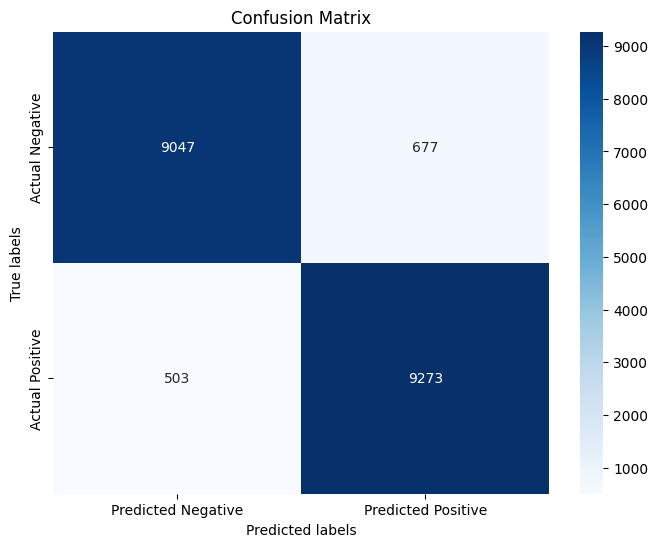

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression(random_state=101)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_train)
pred(predictions,y_train)


In [72]:
predictions=pipeline.predict(X_test)

C:\Users\yashs\AppData\Local\Temp\ipykernel_4764\1900591691.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  raw_text = BeautifulSoup(raw_text).get_text()


## CLASSIFICATION REPORT OF Naive Bayes classifier

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_train)
pred(predictions,y_train)

C:\Users\yashs\AppData\Local\Temp\ipykernel_4764\1900591691.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  raw_text = BeautifulSoup(raw_text).get_text()
C:\Users\yashs\AppData\Local\Temp\ipykernel_4764\1900591691.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  raw_text = BeautifulSoup(raw_text).get_text()


CONFUSION MATRIX ------->> 
col_0         0     1
sentiment            
0          9054   670
1           843  8933

Classification paradox :------->>
Accuracy :-  92.24

False Negative Rate :-  8.62

False Postive Rate :-  6.89

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      9724
           1       0.93      0.91      0.92      9776

    accuracy                           0.92     19500
   macro avg       0.92      0.92      0.92     19500
weighted avg       0.92      0.92      0.92     19500



In [74]:
#Saving Output
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline_logit = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression(random_state=101)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline_logit.fit(train_df['review'],train_df['sentiment'])
test_df['sentiment'] = pipeline_logit.predict(test_df['review'])



C:\Users\yashs\AppData\Local\Temp\ipykernel_4764\1900591691.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  raw_text = BeautifulSoup(raw_text).get_text()
C:\Users\yashs\AppData\Local\Temp\ipykernel_4764\1900591691.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  raw_text = BeautifulSoup(raw_text).get_text()


In [75]:
test_df.head(5)


,id,review,sentiment
0,12311_10,Naturally in a film who's main themes are of m...,1
1,8348_2,This movie is a disaster within a disaster fil...,0
2,5828_4,"All in all, this is a movie for kids. We saw i...",1
3,7186_2,Afraid of the Dark left me with the impression...,1
4,12128_7,A very accurate depiction of small time mob li...,1


In [76]:
output = test_df[['id','sentiment']]
print(output)

             id  sentiment
0      12311_10          1
1        8348_2          0
2        5828_4          1
3        7186_2          1
4       12128_7          1
...         ...        ...
24995   2155_10          1
24996     59_10          1
24997    2531_1          0
24998    7772_8          1
24999  11465_10          1

[25000 rows x 2 columns]
